In [1]:
import nease
import pandas as pd

### Input of NEASE

In [2]:
# Diff spliced events in Multiple sclerosis (MS)
table=pd.read_table('AS data/MS/AL_NAWM.deltapsi.tsv')

### Run NEASE

In [3]:
# Run nease with standard input.
events=nease.run(table, organism='Human',input_type='MAJIQ')

Processing MAJIQ format...
MAJIQ output converted successfully to NEASE format.

		Data Summary
**************************************************
19 protein domains are affected by AS.

1 linear motifs are affected by AS.
6 interacting resiude are affected by AS.

14 of the affected domains/motifs have known interactions.
156 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


### Classic gene enrichment

In [4]:
# Run on KEGG gene set
enr=events.classic_enrich(gseapy_databases=['Reactome_2016']).head(10)
enr

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Muscle contraction Homo sapiens R-HSA-397014,9/196,0.000001,0.000506,0,0,9.483209,128.739408,CAMK2D;TPM2;CACNA2D1;TPM1;ATP2B4;DMD;CACNA1C;ATP2B1;SLC8A1
1,Reactome_2016,Reduction of cytosolic Ca++ levels Homo sapiens R-HSA-418359,3/12,0.000033,0.005953,0,0,62.522013,644.367346,ATP2B4;ATP2B1;SLC8A1
2,Reactome_2016,Activation of NMDA receptor upon glutamate binding and postsynaptic events Homo sapiens R-HSA-442755,4/39,0.000059,0.005953,0,0,21.611973,210.358328,GRIA1;CAMK2D;BRAF;GRIN1
3,Reactome_2016,Cardiac conduction Homo sapiens R-HSA-5576891,6/135,0.000097,0.005953,0,0,8.923911,82.468696,CAMK2D;CACNA2D1;ATP2B4;CACNA1C;ATP2B1;SLC8A1
4,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,10/420,0.000100,0.005953,0,0,4.799458,44.183420,GRIA1;GOLGA2;C2CD5;TSG101;TFG;KIF3A;AP1B1;DTNBP1;MIA3;BICD1
5,Reactome_2016,"Unblocking of NMDA receptor, glutamate binding and activation Homo sapiens R-HSA-438066",3/17,0.000101,0.005953,0,0,40.182615,369.585221,GRIA1;CAMK2D;GRIN1
6,Reactome_2016,NRAGE signals death through JNK Homo sapiens R-HSA-193648,4/45,0.000105,0.005953,0,0,18.443670,169.025198,ARHGEF11;MCF2L;ARHGEF3;ARHGEF7
7,Reactome_2016,Ion homeostasis Homo sapiens R-HSA-5578775,4/51,0.000171,0.007790,0,0,16.084296,139.488727,CAMK2D;ATP2B4;ATP2B1;SLC8A1
8,Reactome_2016,Signalling by NGF Homo sapiens R-HSA-166520,10/450,0.000176,0.007790,0,0,4.465335,38.599100,ARHGEF11;CAMK2D;MCF2L;AKT3;ARHGEF3;RAPGEF2;BRAF;ARHGEF7;DUSP16;GRIN1
9,Reactome_2016,SALM protein interactions at the synapse Homo sapiens R-HSA-8849932,3/22,0.000225,0.008949,0,0,29.600794,248.647657,GRIA1;DLG3;GRIN1


In [5]:
enr.to_csv("MS:gene-level enrichment.csv")

### NEASE analysis


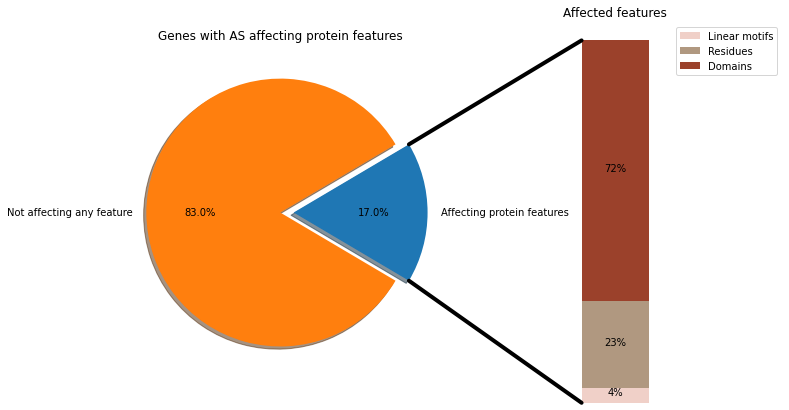

In [6]:
events.get_stats()

In [7]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_domains()

,Gene name,NCBI gene ID,Gene stable ID,Exon stable ID,Pfam ID,dPSI,Interacting domain,Interaction type,Visualization link
0,GRIA1,2890,ENSG00000155511,ENSE00003466032,PF00060,0.518941,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003466032
1,PDE4DIP,9659,ENSG00000178104,ENSE00003718882,PF07989,0.410351,False,None,
2,MYH10,4628,ENSG00000133026,ENSE00002227801,PF00063,0.401442,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00002227801
3,ATP2B1,490,ENSG00000070961,ENSE00000909422,PF12424,0.393826,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00000909422
4,ATP2B1,490,ENSG00000070961,ENSE00000909422,PF00689,0.393826,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00000909422
5,BRAF,673,ENSG00000157764,ENSE00003527888,PF07714,0.390281,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003527888
6,SLC25A25,114789,ENSG00000148339,ENSE00003580484,PF13499,0.379921,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003580484
7,DMD,1756,ENSG00000198947,ENSE00003533177,PF00435,0.367859,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003533177
8,LRRFIP2,9209,ENSG00000093167,ENSE00000966409,PF09738,0.363962,False,None,
9,ALDH3A2,224,ENSG00000072210,ENSE00003768857,PF00171,0.343445,True,DDI,https://exbio.wzw.tum.de/digger/ID/exon/ENSE00003768857


In [8]:
events.get_edges().to_csv('MS.csv')

In [9]:
# get the affected linear motifs
events.get_elm()

,Gene name,entrezgene,Gene stable ID,ELMIdentifier,dPSI,ELM link
0,ATP2B1,490,ENSG00000070961,TRG_DiLeu_BaLyEn_6,0.393826,http://elm.eu.org/elms/TRG_DiLeu_BaLyEn_6


In [10]:
# get interacting residues affected by AS
events.get_pdb()

,Gene name,NCBI gene ID,Gene stable ID,Co-resolved interactions symbol,Co-resolved interactions
0,LRRFIP1,9208,ENSG00000124831,LRRFIP1,9208
1,ATP2B1,490,ENSG00000070961,"CALM3,CALM1,CALM2,NPTN","808,801,805,27020"
2,BRAF,673,ENSG00000157764,"BRAF,MAP2K1","673,5604"
3,SNRPA1,6627,ENSG00000131876,SNRPB2,6629
4,MRPL48,51642,ENSG00000175581,"MRPL27,MRPL38","51264,64978"
5,GRIA1,2890,ENSG00000155511,GRIA2,2891


In [11]:
# List of affected interactions (domain binding)

events.get_edges()

,Gene name,NCBI gene ID,Identifier,dPSI,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,BRAF,673,PF07714,0.390281,31,"MAPK1,PRKCE,IGF1R,AURKA,NRAS,MAPK3,LIMK1,MAP2K6,ARAF,RAP1A,EGFR,LATS2,RPS6KB2,FKBP5,MAP2K3,RAP1B,MAP2K7,PAK2,KSR1,AKT1,MRAS,MAP2K2,STK11,RAB1A,MAP2K1,KRAS,IQGAP1,BRAF,FGFR2,RAF1,HRAS","5594,5581,3480,6790,5595,3984,5608,369,5906,2263,1956,6199,26524,2289,5606,5908,5609,5062,8844,207,22808,5605,6794,5861,5604,3845,8826,673,5894,4893,3265"
1,MAP2K4,6416,PF00069,0.314945,29,"MAP3K5,MAP3K3,MAP3K1,MAPK9,MAPK1,MAP3K2,MAPK8,NPHS1,ITCH,MAP3K7,PLEKHA4,MAP2K6,GEMIN5,JUN,NBR1,MAP3K8,EGFR,MAPK10,MAP2K7,MAP2K4,MAPK14,AKT1,MAP3K11,LRRK2,MAP3K4,BLNK,MAP4K2,UBC,MAP3K10","4217,4215,4214,5601,5594,10746,5599,4868,83737,6885,57664,5608,25929,3725,4077,1326,1956,5602,5609,6416,1432,207,4296,120892,4216,29760,5871,7316,4294"
2,SNRPA1,6627,PF14580,0.271745,28,"RBM14,LSM2,SSB,SYNCRIP,SNRNP70,SFPQ,SNRPN,SNRPE,U2AF1,SNRPA,SNRPD3,LARP7,TAF15,SRSF7,PPIE,SNRPG,SNRPF,U2AF2,SNRPB,SNRPB2,SNRPD2,TARDBP,SNRPD1,SF3B6,HTATSF1,SRSF1,SF3B4,HNRNPM","10432,57819,6741,10492,6625,6421,6638,6635,7307,6626,51574,6634,8148,6432,10450,6637,6636,11338,6628,6629,6633,23435,6632,51639,27336,6426,10262,4670"
3,MYH10,4628,PF00063,0.401442,19,"MYL6,GRK5,WDR77,USP45,EED,ACTC1,MARK4,MYO1C,CYLD,MYO19,PAK2,IKBKE,UBASH3B,ACTA2,CDK2,MCC,MYH9,IQGAP1,CDK9","4637,2869,79084,85015,8726,70,57787,4641,1540,80179,5062,9641,84959,59,1017,4163,4627,8826,1025"
4,GRIA1,2890,PF00060,0.518941,9,"GRIP1,GRID2,GRIK2,PICK1,DLG1,SDCBP,GRIA2,GRIA4,CACNG2","23426,2895,2898,9463,1739,6386,2891,2893,10369"
5,BTN2A1,11120,PF07686,0.276245,9,"SLC25A30,CD1B,PIK3R3,HLA,POTEF,BTN2A2,SLC25A14,TMX4,PDZD8","253512,910,3113,8503,728378,10385,9016,56255,118987"
6,DMD,1756,PF00435,0.367859,8,"MARK2,MAP3K5,PLEKHA4,UTRN,SNTA1,SNTB1,NEDD4,PAK5","4217,57664,6641,7402,6640,4734,2011,57144"
7,GRIN1,2902,PF01094,0.308774,6,"GRIN3A,CAMK2G,GRIN3B,GRIN2A,PRKCA,GRIN2B","116443,818,116444,2903,5578,2904"
8,SYNE1,23345,PF00307,0.282537,4,"SYNE1,MUSK,PPEF1,NTRK1","23345,4593,5475,4914"
9,SLC25A25,114789,PF13499,0.379921,3,"STK38L,CD79B,SLC25A23","23012,79085,974"


### NEASE edge enrichment 

In [12]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['KEGG'])
nease_enr.head(10)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 118 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:hsa04912,GnRH signaling pathway - Homo sapiens (human),KEGG,"ATP2B1 (3), BRAF (12), MAP2K4 (14), GRIN1 (2)",5.440544e-16,8.732074e-14,30.528715
1,path:hsa04024,cAMP signaling pathway - Homo sapiens (human),KEGG,"GRIA1 (2), ATP2B1 (4), BRAF (9), MAP2K4 (6), GRIN1 (5), BTN2A1 (1)",6.456673e-12,6.908641e-10,25.021581
2,path:hsa04010,MAPK signaling pathway - Homo sapiens (human),KEGG,"GRIA1 (1), MYH10 (1), BRAF (21), DMD (1), MAP2K4 (20), GRIN1 (1), SYNE1 (1)",7.178777e-17,2.304387e-14,22.830992
3,path:hsa04014,Ras signaling pathway - Homo sapiens (human),KEGG,"MYH10 (1), ATP2B1 (3), BRAF (17), DMD (1), MAP2K4 (6), GRIN1 (3), SYNE1 (1), BTN2A1 (1)",4.847437e-11,3.112055e-09,20.628976
4,path:hsa04015,Rap1 signaling pathway - Homo sapiens (human),KEGG,"ATP2B1 (3), BRAF (18), MAP2K4 (5), GRIN1 (3), BTN2A1 (1)",1.664812e-10,5.937830e-09,19.557270
5,path:hsa04722,Neurotrophin signaling pathway - Homo sapiens (human),KEGG,"ATP2B1 (3), BRAF (13), DMD (1), MAP2K4 (11), GRIN1 (1), SYNE1 (1), BTN2A1 (1)",8.337081e-11,3.596654e-09,17.457316
6,path:hsa04012,ErbB signaling pathway - Homo sapiens (human),KEGG,"MYH10 (1), BRAF (15), DMD (1), MAP2K4 (9), GRIN1 (2), BTN2A1 (1)",8.865283e-11,3.596654e-09,17.411107
7,path:hsa04720,Long-term potentiation - Homo sapiens (human),KEGG,"GRIA1 (1), ATP2B1 (3), BRAF (12), MAP2K4 (1), GRIN1 (4)",6.695882e-10,1.953980e-08,15.890167
8,path:hsa05170,Human immunodeficiency virus 1 infection - Homo sapiens (human),KEGG,"MYH10 (1), ATP2B1 (3), BRAF (15), DMD (1), MAP2K4 (10), GRIN1 (1), BTN2A1 (1)",1.878367e-09,5.024632e-08,15.114256
9,path:hsa04620,Toll-like receptor signaling pathway - Homo sapiens (human),KEGG,"MYH10 (1), BRAF (8), MAP2K4 (12), BTN2A1 (1)",3.340314e-11,2.680602e-09,14.815602


In [13]:
# Run nease enrichment on affected edges
nease_enr=events.enrich(database=['Reactome'])
nease_enr.head(20)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 68 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-112314,Neurotransmitter receptors and postsynaptic signal transmission,Reactome,"GRIA1 (7), ATP2B1 (2), BRAF (4), MAP2K4 (1), GRIN1 (4)",4.388765e-09,0.000004,16.715315
1,R-HSA-5210891,Uptake and function of anthrax toxins,Reactome,"ATP2B1 (1), BRAF (5), MAP2K4 (3)",2.984146e-09,0.000004,14.766045
2,R-HSA-112315,Transmission across Chemical Synapses,Reactome,"GRIA1 (7), ATP2B1 (2), BRAF (4), MAP2K4 (1), GRIN1 (4)",5.657870e-08,0.000010,14.494694
3,R-HSA-5339562,Uptake and actions of bacterial toxins,Reactome,"ATP2B1 (1), BRAF (5), MAP2K4 (3)",3.466487e-08,0.000009,12.921290
4,R-HSA-112316,Neuronal System,Reactome,"GRIA1 (7), ATP2B1 (2), BRAF (4), MAP2K4 (1), GRIN1 (4)",8.712595e-07,0.000122,12.119705
5,R-HSA-5683057,MAPK family signaling cascades,Reactome,"MYH10 (2), ATP2B1 (1), BRAF (17), MAP2K4 (5), GRIN1 (3)",1.523614e-06,0.000184,10.075556
6,R-HSA-442755,Activation of NMDA receptor and postsynaptic events,Reactome,"GRIA1 (2), ATP2B1 (1), BRAF (4), MAP2K4 (1), GRIN1 (3)",2.124721e-06,0.000241,9.825401
7,R-HSA-2871796,FCERI mediated MAPK activation,Reactome,"MYH10 (1), BRAF (7), MAP2K4 (8)",2.523181e-07,0.000038,9.331054
8,R-HSA-5673001,RAF/MAP kinase cascade,Reactome,"MYH10 (1), ATP2B1 (1), BRAF (16), MAP2K4 (4), GRIN1 (3)",1.002653e-06,0.000130,8.483654
9,R-HSA-6802946,Signaling by moderate kinase activity BRAF mutants,Reactome,"MYH10 (1), BRAF (14), MAP2K4 (2)",8.303245e-09,0.000004,8.080752


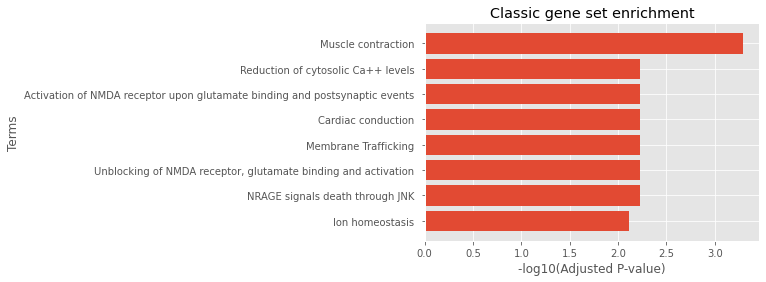

In [14]:
import numpy as np
import matplotlib.pyplot as plt

Term = enr['Term'][:8]
Term = [x.split('Homo')[0] for x in Term]
Pvalues =enr['Adjusted P-value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]
plt.style.use('ggplot')

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('Classic gene set enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/Platelet/classic_enr',format='pdf',bbox_inches='tight')

plt.show()

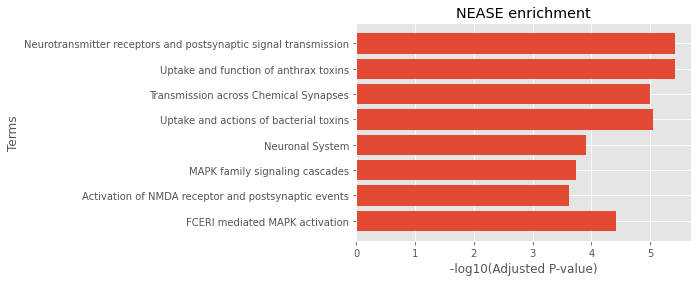

In [15]:
nease_enr=nease_enr.sort_values(by='Nease score',ascending=False)
Term = nease_enr['Pathway name'][:8]
Pvalues =nease_enr['adj p_value'][:8]
Pvalues=[ -np.log10(x) for x in Pvalues]

plt.barh(Term[::-1],Pvalues[::-1] )
plt.title('NEASE enrichment')
plt.ylabel('Terms')
plt.xlabel('-log10(Adjusted P-value)')
plt.savefig('AS data/Platelet/nease_enr',format='pdf',bbox_inches='tight')
plt.show()

### Pathway specific analysis

In [16]:
events.path_analysis('R-HSA-112314')

Enrichment of the pathway: Neurotransmitter receptors and postsynaptic signal transmission.

Overall p_value:  4.3887649017364704e-09




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,GRIA1,2890,True,7/9,5.200573e-11,"GRIP1,GRIK2,PICK1,DLG1,GRIA2,GRIA4,CACNG2","23426,2898,9463,1739,2891,2893,10369"
1,GRIN1,2902,True,4/6,2.546229e-06,"CAMK2G,GRIN2A,PRKCA,GRIN2B","818,2903,5578,2904"
2,BRAF,673,True,4/31,3.551109e-03,"MAPK1,RAF1,BRAF,HRAS","5594,5894,673,3265"
3,ATP2B1,490,False,2/5,4.022942e-03,"NPTN,CALM1","27020,801"
4,MAP2K4,6416,False,1/29,4.512438e-01,MAPK1,5594


In [17]:
events.path_analysis('R-HSA-112314').to_csv('ms.csv')

Enrichment of the pathway: Neurotransmitter receptors and postsynaptic signal transmission.

Overall p_value:  4.3887649017364704e-09




In [18]:
events.path_analysis('R-HSA-5683057')

Enrichment of the pathway: MAPK family signaling cascades.

Overall p_value:  1.5236135503920961e-06




,Spliced genes,NCBI gene ID,Gene is known to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,BRAF,673,True,17/31,1.055750e-12,"MAPK1,MAPK3,ARAF,RAP1A,EGFR,RAP1B,PAK2,KSR1,MAP2K2,RAF1,MAP2K1,KRAS,IQGAP1,BRAF,FGFR2,NRAS,HRAS","5594,5595,369,5906,1956,5908,5062,8844,5605,5894,5604,3845,8826,673,2263,4893,3265"
1,GRIN1,2902,True,3/6,5.070679e-03,"CAMK2G,GRIN2A,GRIN2B","818,2903,2904"
2,MAP2K4,6416,False,5/29,4.072469e-02,"MAPK1,JUN,EGFR,MAP3K11,UBC","5594,3725,1956,4296,7316"
3,ATP2B1,490,False,1/5,2.915591e-01,CALM1,801
4,MYH10,4628,False,2/19,3.641801e-01,"PAK2,IQGAP1","5062,8826"


### Visualization

In [19]:
events.Vis_path("R-HSA-5674135",file='AS data',k=0.8)

Enrichment of the pathway: MAP2K and MAPK activation.

Overall p_value:  4.351950286464467e-08


Visualization of the pathway generated in: MAP2K and MAPK activation.html


In [20]:
events.Vis_path("R-HSA-112314",file='AS data',k=0.8)

Enrichment of the pathway: Neurotransmitter receptors and postsynaptic signal transmission.

Overall p_value:  4.3887649017364704e-09


Visualization of the pathway generated in: Neurotransmitter receptors and postsynaptic signal transmission.html
